a)  Implement custom functions for each distance measure:
euclidean_distance(point1, point2)
manhattan_distance(point1, point2)
minkowski_distance(point1, point2, p)

In [1]:
import math

In [2]:
def euclidean_distance(point1, point2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

In [3]:
def manhattan_distance(point1, point2):
    return sum(abs(x - y) for x, y in zip(point1, point2))

In [4]:
def minkowski_distance(point1, point2, p):
    return (sum(abs(x - y) ** p for x, y in zip(point1, point2))) ** (1 / p)

In [5]:
point1 = [1, 2, 3]
point2 = [4, 6, 8]

In [6]:
euclidean = euclidean_distance(point1, point2)
manhattan = manhattan_distance(point1, point2)
minkowski = minkowski_distance(point1, point2, 3) 

print("Euclidean Distance:", euclidean)
print("Manhattan Distance:", manhattan)
print("Minkowski Distance (p=3):", minkowski)

Euclidean Distance: 7.0710678118654755
Manhattan Distance: 12
Minkowski Distance (p=3): 5.999999999999999


b) Implement custom functions for each classification metric 
confusion_matrix(y_true, y_pred)
accuracy(y_true, y_pred)
precision(y_true, y_pred)
recall(y_true, y_pred)
f1_score(y_true, y_red)


In [7]:
def confusion_matrix(y_true, y_pred):
    tp = sum((yt == 1 and yp == 1) for yt, yp in zip(y_true, y_pred))
    tn = sum((yt == 0 and yp == 0) for yt, yp in zip(y_true, y_pred))
    fp = sum((yt == 0 and yp == 1) for yt, yp in zip(y_true, y_pred))
    fn = sum((yt == 1 and yp == 0) for yt, yp in zip(y_true, y_pred))
    return {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn}

In [8]:
def print_confusion_matrix(cm):
    print(f"Confusion Matrix:")
    print(f"                Predicted Positive   Predicted Negative")
    print(f"Actual Positive        {cm['TP']}                    {cm['FN']}")
    print(f"Actual Negative        {cm['FP']}                    {cm['TN']}")

In [9]:
def accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return (cm['TP'] + cm['TN']) / len(y_true)

In [10]:
def precision(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm['TP'] / (cm['TP'] + cm['FP']) if (cm['TP'] + cm['FP']) != 0 else 0


In [11]:
def recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm['TP'] / (cm['TP'] + cm['FN']) if (cm['TP'] + cm['FN']) != 0 else 0

In [12]:
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0

In [13]:
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

In [14]:
conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy(y_true, y_pred)
prec = precision(y_true, y_pred)
rec = recall(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print_confusion_matrix(conf_matrix)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Confusion Matrix:
                Predicted Positive   Predicted Negative
Actual Positive        4                    1
Actual Negative        1                    4
Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002


c) Consider Iris Dataset
Spit (70% for Training, 30% for Testing)
Train KNN classifier with different K values from K=1 to 10.
Identify the best K value in the range (1,10)
Evaluate your model on the Test set by computing classification metrics.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv(r'D:\3_YEAR_5_SEM\303_MACHINE_LEARNING\week-5\iris - iris.csv')

X = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = data['variety']




Classification report for K=1:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Classification report for K=2:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Classification report for K=3:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1

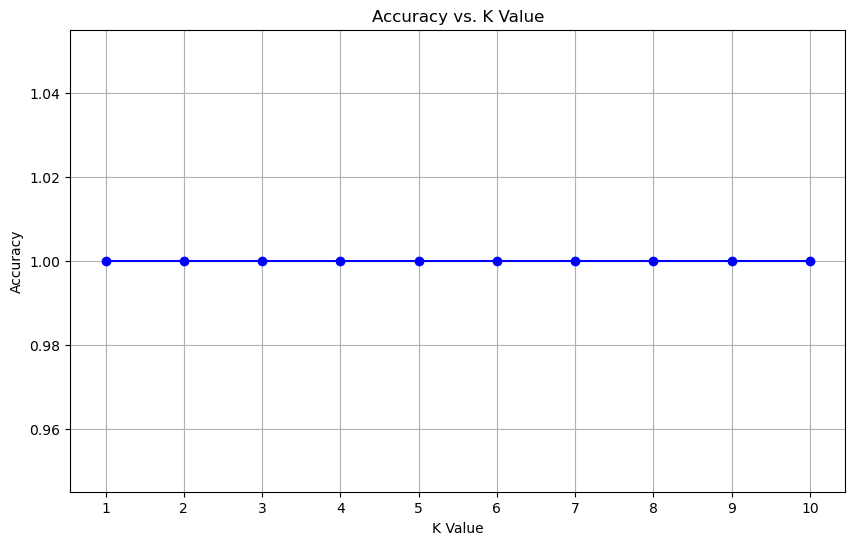

The best K value is: 1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


accuracies = []


for k in range(1, 11):
    # Initialize the KNN classifier with current K
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Display classification report for the current K
    print(f"\nClassification report for K={k}:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o', color='b')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


best_k = accuracies.index(max(accuracies)) + 1
print(f'The best K value is: {best_k}')
